In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [3]:
#build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [4]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

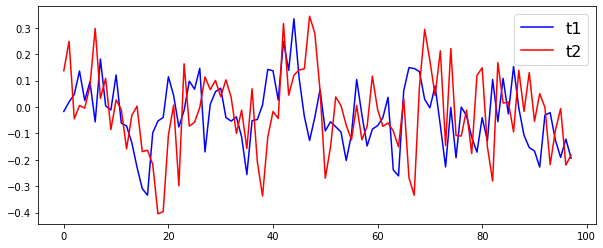

In [5]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [6]:
# Make sure that the first column is a time series that is granger caused by the second one 
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [7]:
ts_df

,t2,t1
0,0.137226,-0.017061
1,0.248354,0.018862
2,-0.044967,0.047328
3,0.005625,0.135928
4,-0.004387,0.024044
...,...,...
93,-0.218597,-0.021693
94,-0.088752,-0.125446
95,-0.006155,-0.190943
96,-0.219940,-0.121606


In [8]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0789  , p=0.0826  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=3.1771  , p=0.0747  , df=1
likelihood ratio test: chi2=3.1262  , p=0.0770  , df=1
parameter F test:         F=3.0789  , p=0.0826  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6692  , p=0.0048  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=11.9613 , p=0.0025  , df=2
likelihood ratio test: chi2=11.2728 , p=0.0036  , df=2
parameter F test:         F=5.6692  , p=0.0048  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.3804 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=121.0614, p=0.0000  , df=3
likelihood ratio test: chi2=78.0601 , p=0.0000  , df=3
parameter F test:         F=37.3804 , p=0.0000  , df_denom=88, df_num=3
